<a href="https://colab.research.google.com/github/Dhiyanesh-babu/Deep-Learning-Algorithms/blob/main/2_Tensorflow_Keras_Classifier_More_obervation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Verify installation - 
import tensorflow as tf

In [2]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.7.0
Keras Version: 2.7.0


### GPU/CPU Check

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU is available
details
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## A simple classifier using Keras's Sequential API

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN



In [8]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [10]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.



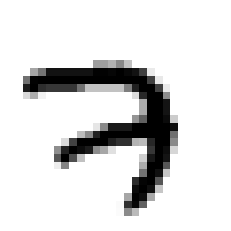

In [11]:
# lets view the first data point of X_train
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


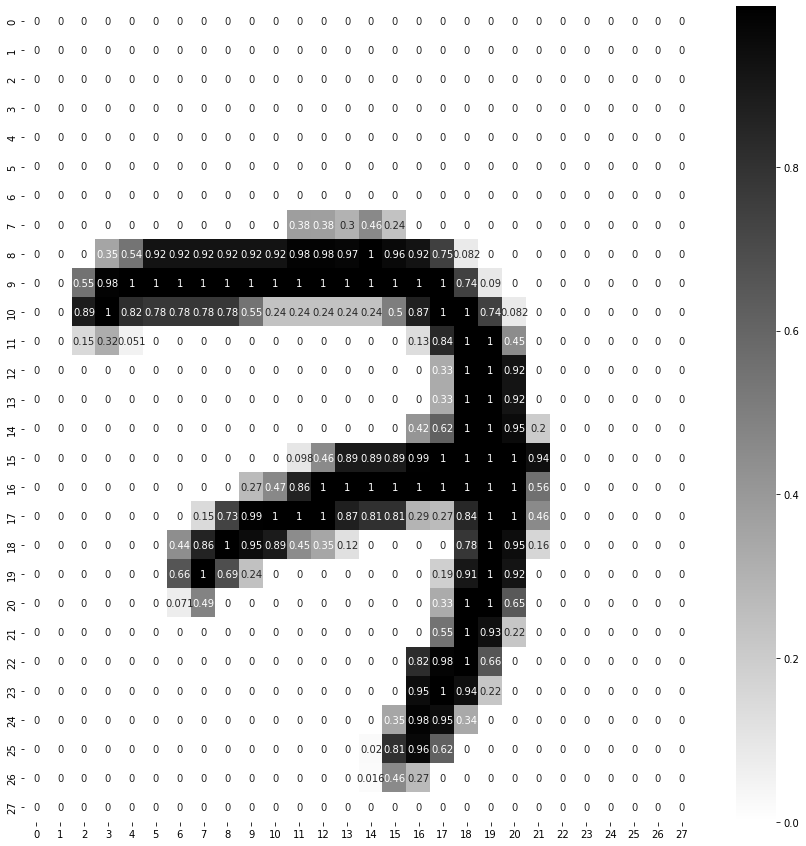

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [13]:
# actual value of y_train
y_train[0]

7

In [14]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

#### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

#### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### For custom weights initialiser or setting weights 
refer [here](https://keras.io/api/layers/base_layer/#setweights-method)

In [16]:
model_clf.layers

In [17]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [19]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [20]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [21]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [22]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [23]:
type(hidden1.get_weights())

list

In [24]:
hidden1.get_weights()

[array([[ 0.0452676 ,  0.04989208, -0.04682188, ..., -0.04521696,
          0.00176052, -0.04816682],
        [ 0.04564749, -0.05505855, -0.0178854 , ..., -0.03083701,
         -0.03695668,  0.02457874],
        [ 0.04014561, -0.01988493, -0.07124306, ...,  0.07050163,
          0.05811343, -0.03971465],
        ...,
        [-0.07382381, -0.02505424,  0.02931929, ...,  0.05209315,
          0.07092619,  0.0446701 ],
        [ 0.01363436,  0.02927168,  0.06747192, ...,  0.04188503,
         -0.01309266,  0.06732233],
        [-0.0519803 ,  0.04022279, -0.01864417, ..., -0.04441568,
         -0.01291532,  0.01955023]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[ 0.0452676 ,  0.04989208, -0.04682188, ..., -0.04521696,
         0.00176052, -0.04816682],
       [ 0.04564749, -0.05505855, -0.0178854 , ..., -0.03083701,
        -0.03695668,  0.02457874],
       [ 0.04014561, -0.01988493, -0.07124306, ...,  0.07050163,
         0.05811343, -0.03971465],
       ...,
       [-0.07382381, -0.02505424,  0.02931929, ...,  0.05209315,
         0.07092619,  0.0446701 ],
       [ 0.01363436,  0.02927168,  0.06747192, ...,  0.04188503,
        -0.01309266,  0.06732233],
       [-0.0519803 ,  0.04022279, -0.01864417, ..., -0.04441568,
        -0.01291532,  0.01955023]], dtype=float32)

In [27]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [29]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

In [30]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)


Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6017 - accuracy: 0.8477 - val_loss: 0.2987 - val_accuracy: 0.9176
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2839 - accuracy: 0.9188 - val_loss: 0.2319 - val_accuracy: 0.9356
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2322 - accuracy: 0.9343 - val_loss: 0.2018 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1986 - accuracy: 0.9443 - val_loss: 0.1763 - val_accuracy: 0.9520
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1733 - accuracy: 0.9508 - val_loss: 0.1549 - val_accuracy: 0.9570
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1533 - accuracy: 0.9564 - val_loss: 0.1427 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1373 - accuracy: 0.9612 - val_loss: 0.1290 - val_accuracy:

In [54]:
import os
import time

ROOT = "/content/drive/MyDrive/Deep learning notebooks/General"
os.chdir(ROOT)
def saveModel_path(model_dir="model"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [55]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
model/Model_2022_02_02_18_40_16_.h5


In [34]:
history.params


{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [35]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.601664,0.847655,0.298729,0.9176
1,0.283876,0.918818,0.231946,0.9356
2,0.232221,0.934273,0.201778,0.9436
3,0.198568,0.944309,0.176326,0.9520
4,0.173265,0.950836,0.154874,0.9570
5,0.153282,0.956418,0.142686,0.9612
6,0.137265,0.961182,0.128995,0.9640
7,0.124063,0.965036,0.119244,0.9678
8,0.113033,0.967491,0.111029,0.9696
9,0.103100,0.970673,0.105991,0.9700


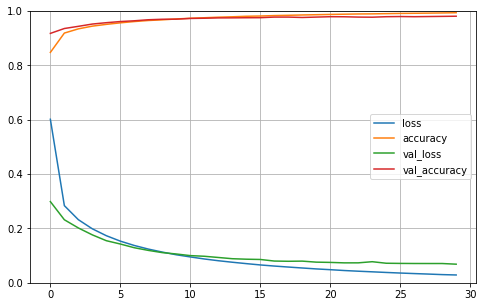

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9787


[0.07209620624780655, 0.9786999821662903]

In [38]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([7, 2, 1])

In [40]:
y_test_new = y_test[:3]

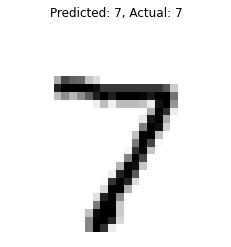

------------------------------------------------------------


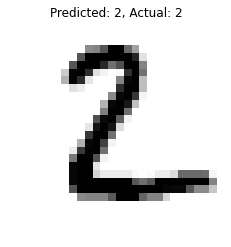

------------------------------------------------------------


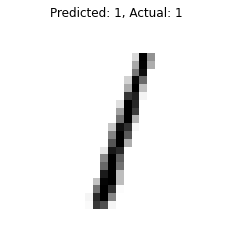

------------------------------------------------------------


In [41]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [42]:
weights, biases = hidden1.get_weights()


In [43]:
weights

array([[ 0.0452676 ,  0.04989208, -0.04682188, ..., -0.04521696,
         0.00176052, -0.04816682],
       [ 0.04564749, -0.05505855, -0.0178854 , ..., -0.03083701,
        -0.03695668,  0.02457874],
       [ 0.04014561, -0.01988493, -0.07124306, ...,  0.07050163,
         0.05811343, -0.03971465],
       ...,
       [-0.07382381, -0.02505424,  0.02931929, ...,  0.05209315,
         0.07092619,  0.0446701 ],
       [ 0.01363436,  0.02927168,  0.06747192, ...,  0.04188503,
        -0.01309266,  0.06732233],
       [-0.0519803 ,  0.04022279, -0.01864417, ..., -0.04441568,
        -0.01291532,  0.01955023]], dtype=float32)

In [44]:
biases

array([ 2.02490240e-02,  5.08269072e-02,  1.45215150e-02,  2.81325094e-02,
        6.19678833e-02,  3.63235809e-02, -2.66787689e-02,  3.08021773e-02,
        5.88627160e-02,  3.94247510e-02,  3.22507578e-03,  3.11555620e-02,
        1.36545273e-02, -2.67916434e-02, -1.05086546e-02,  1.74349844e-02,
       -4.93389107e-02, -2.40173973e-02, -4.23800945e-03, -4.34077112e-03,
        4.90990505e-02,  8.44769296e-04,  3.19558987e-03,  1.89338427e-03,
       -1.54856658e-02, -2.28792038e-02,  4.39422540e-02, -5.96366683e-03,
        4.86694202e-02,  3.08462158e-02,  1.42773846e-02,  4.24068049e-02,
        2.91189477e-02, -3.10288761e-02,  5.39507493e-02,  2.51001865e-02,
        3.45125832e-02, -1.02464110e-02,  3.09556909e-02,  1.83307212e-02,
        2.74567213e-02, -4.93879840e-02,  2.14422811e-02,  5.83128147e-02,
       -1.01679116e-02,  2.94663738e-02, -2.56676320e-03, -8.02011928e-05,
       -1.87264774e-02, -7.70798251e-02, -3.00204791e-02,  7.83029050e-02,
        2.46503130e-02,  

<iframe src="https://slides.com/supremecommander/basic-neural-network/embed" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>

<iframe src="https://slides.com/supremecommander/basic-neural-network/embed" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>